### Introduction to attention mechanisms

## Understanding the Limitations of RNNs and the Need for Attention

### Challenges of RNNs
- **Sequential Processing:** RNNs process input sequences one step at a time, making it difficult to parallelize computations and leading to slow training.
- **Long-Term Dependency Problems:** RNNs struggle to retain information from earlier time steps, making it hard to capture long-range dependencies due to vanishing or exploding gradients.
- **Fixed Context Vectors:** Traditional sequence-to-sequence models use a single, fixed-length context vector to represent the entire input sequence, which can lead to information bottlenecks, especially for long sequences.

---

### Role of Attention Mechanisms

Attention mechanisms address these limitations by allowing the model to dynamically focus on different parts of the input sequence at each output step. Instead of relying on a single context vector, attention computes a weighted combination of all input tokens, enabling the model to selectively emphasize relevant information for each output token.

---

### Basics of the Attention Mechanism

#### Core Components
- **Queries (Q):** Represent the current focus of the model (e.g., the current decoder state in sequence-to-sequence tasks).
- **Keys (K):** Encoded representations of the input sequence, used to match against the query.
- **Values (V):** Additional information associated with the keys, typically the same as the keys in many implementations.

#### How Attention Works
1. **Score Calculation:** For each query, compute a similarity score with each key (commonly using dot product, scaled dot product, or other similarity functions).
2. **Softmax Normalization:** Apply the softmax function to the scores to obtain attention weights, which sum to 1.
3. **Context Vector:** Compute a weighted sum of the values using the attention weights. This context vector is then used to generate the output.

---

### Types of Attention

#### Self-Attention
- The queries, keys, and values all come from the same input sequence.
- Enables the model to learn dependencies between all elements in a sequence, regardless of their distance.
- Widely used in Transformer models for capturing relationships within a sequence.

#### Multi-Head Attention
- Extends self-attention by applying multiple attention mechanisms (heads) in parallel.
- Each head learns to focus on different aspects or relationships in the sequence.
- The outputs of all heads are concatenated and projected to form the final output:
  
  ```
  MultiHead(Q, K, V) = Concat(head₁, head₂, ..., headₕ)W⁰
  ```
  where each head computes attention with different learned projections of Q, K, and V.

---

### Summary

Attention mechanisms have revolutionized sequence modeling by enabling models to flexibly and efficiently focus on relevant parts of the input. This has led to significant improvements in tasks such as machine translation, text summarization, and more, especially with the advent of Transformer architectures.


In [ ]:
import numpy as np

define queries keys and values

In [6]:
queries = np.array([[1, 0, 1], [0, 1, 1]])
keys = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 1]])
values = np.array([[10, 0], [0, 10], [5, 5]])

# compute attention scores
scores = np.dot(queries, keys.T)


# apply softmax to normalise scores
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

attention_weights = softmax(scores)

# compute weighted sum of values
context = np.dot(attention_weights, values)

print("Attention Weights: /n", attention_weights)
print("Context Vectors: /n", context)

Attention Weights: /n [[0.57611688 0.21194156 0.21194156]
 [0.21194156 0.21194156 0.57611688]]
Context Vectors: /n [[6.82087664 3.17912336]
 [5.         5.        ]]


Now use pytorch

In [7]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

Attention Weights: /n tensor([[0.5761, 0.2119, 0.2119],
        [0.2119, 0.2119, 0.5761]])
Context Vectors: /n tensor([[6.8209, 3.1791],
        [5.0000, 5.0000]])


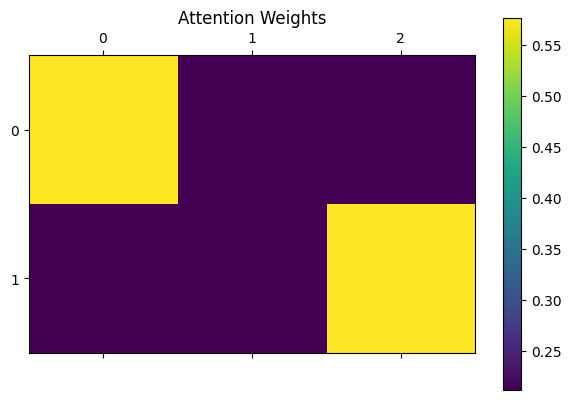

In [8]:
queries = torch.tensor([[1.0, 0.0, 1.0], [0.0, 1.0, 1.0]])
keys = torch.tensor([[1.0, 0.0, 1.0], [1.0, 1.0, 0.0], [0.0, 1.0, 1.0]])
values = torch.tensor([[10, 0], [0, 10], [5.0, 5.0]])

# compute attention scores
scores = torch.matmul(queries, keys.T)

# apply softmax to normalise scores
attention_weights = F.softmax(scores, dim=-1)

# compute weighted sum of values
context = torch.matmul(attention_weights, values)

print("Attention Weights: /n", attention_weights)
print("Context Vectors: /n", context)

# visualise attention weights
plt.matshow(attention_weights)
plt.colorbar()
plt.title("Attention Weights")
plt.show()
